# Lead Scoring -- Case Study

In [5]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

# 1. Reading the data into dataframe

In [6]:
# Reading the data using Pandas
df = pd.read_csv(r'C:\Users\ASHISH\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv')

Basic data checks

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
df.shape

(9240, 37)

In [10]:
# inspecting initial few records
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [11]:
#check for duplicates
sum(df.duplicated(subset = 'Prospect ID')) == 0

True

In [12]:
#check for duplicates
sum(df.duplicated(subset = 'Lead Number')) == 0

True

Prospect ID and Lead Number have no duplicate values and look like unique IDs, so can be dropped

# 2. Data Cleaning

In [13]:
df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [14]:
#Converting 'Select' values to NaN.

df = df.replace('Select', np.nan)

In [15]:
# null values in columns

df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [16]:
# percentage of null values in each column

round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [17]:
#dropping cols with more than 45% missing values

for i in df.columns:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 45):
        df.drop(i, 1, inplace = True)

In [18]:
#checking null values percentage again

round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

# 3. EDA and categorical variables analysis

In [19]:
# value counts of Country column

df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [20]:
# Since India is the most common country, we can impute all missing values with India

df['Country'] = df['Country'].replace(np.nan,'India')

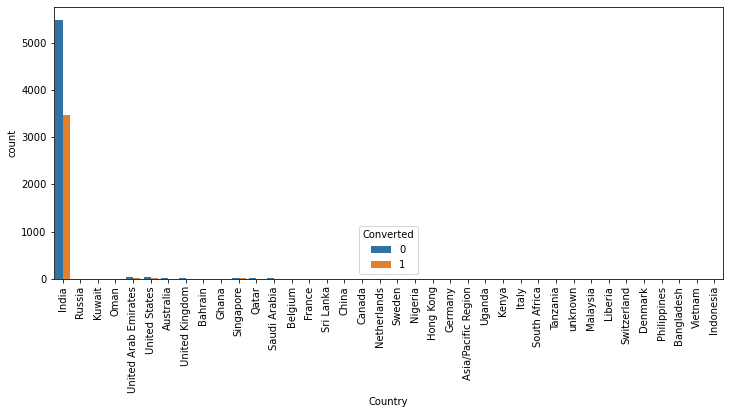

In [21]:
#plotting spread of Country columnn after imputing missing values

plt.figure(figsize=(12,5))
s1=sns.countplot(df.Country, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

As we can see the Number of Values for India are quite high, this column can be dropped

In [22]:
#creating a list of columns to be droppped

cols_to_drop=['Country']

In [23]:
# value counts of "City" column

df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [24]:
df['City'] = df['City'].replace(np.nan,'Mumbai')

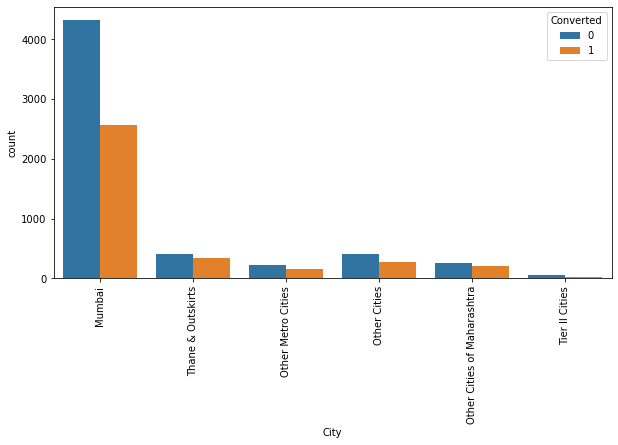

In [25]:
#plotting spread of City columnn after imputing

plt.figure(figsize=(10,5))
s1=sns.countplot(df.City, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


In [26]:
# value counts of "Specialization" column
df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [27]:
# imputing missing values with 'Not Specified'
df['Specialization'] = df['Specialization'].replace(np.nan, 'Not Specified')

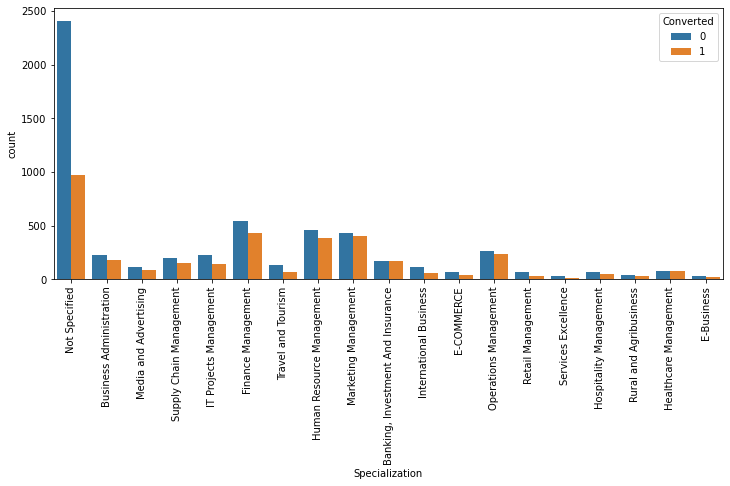

In [28]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(12,5))
s1=sns.countplot(df.Specialization, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Insight: Specilization with Management in it has higher number of leads and converted leads, so this variable looks significant

In [29]:
#grouping all Management Specializations together because they show similar trends

df['Specialization'] = df['Specialization'].replace(['Supply Chain Management','IT Projects Management','Finance Management',
                                                     'Human Resource Management','Marketing Management','Operations Management',
                                                     'Retail Management','Hospitality Management','Healthcare Management'],
                                                    'Management')  

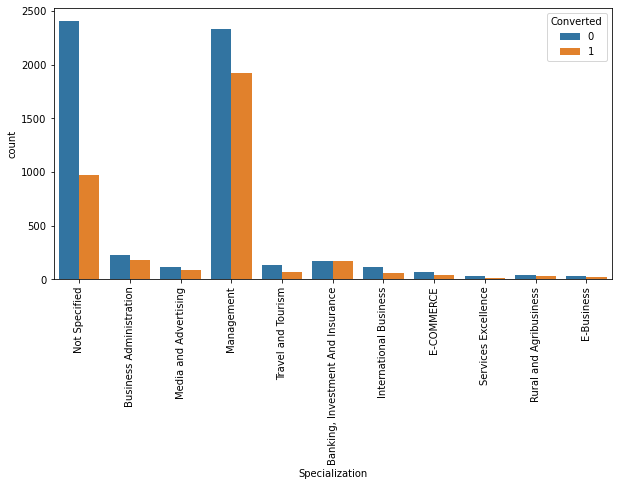

In [30]:
#visualizing count of Specialization after grouping


plt.figure(figsize=(10,5))
s1=sns.countplot(df.Specialization, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [31]:
# value counts for 'What is your current occupation'
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [32]:
#imputing Nan values with mode "Unemployed"

df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

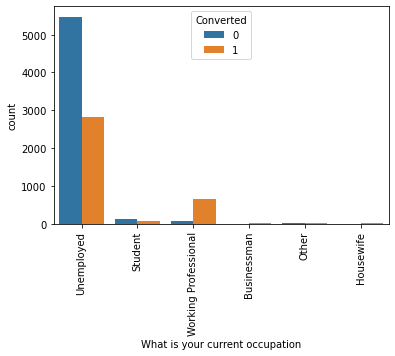

In [33]:
#visualizing count of Variable after Conversion

s1=sns.countplot(df['What is your current occupation'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Insight: Majority leads from unemployed, working professionals have most converted rate

In [34]:
# value counts for "Lead Source"
df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [35]:
#replacing Nan Values and combining low frequency values into Others
df['Lead Source'] = df['Lead Source'].replace(np.nan,'Others')
df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace('Facebook','Social Media')
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')                

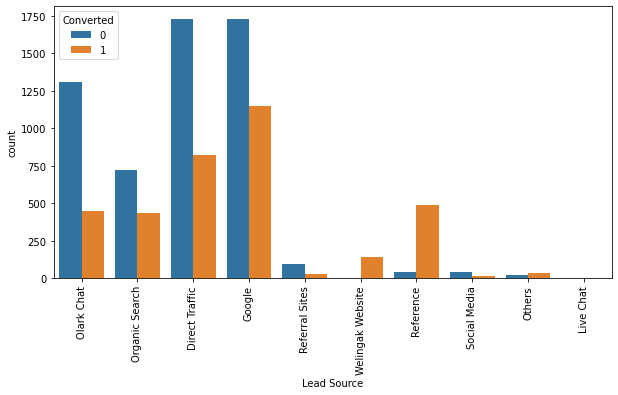

In [36]:
#visualizing count of Variable after conversion
plt.figure(figsize=(10,5))
s1=sns.countplot(df['Lead Source'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Insight: Majority leads from Direct Traffic and Google source, Conversion rate of Reference and Welingak Website is high

In [37]:
# value counts for 'What matters most to you in choosing a course'

df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [38]:
# imputing Nan values with Mode "Better Career Prospects"

df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(
    np.nan,'Better Career Prospects')

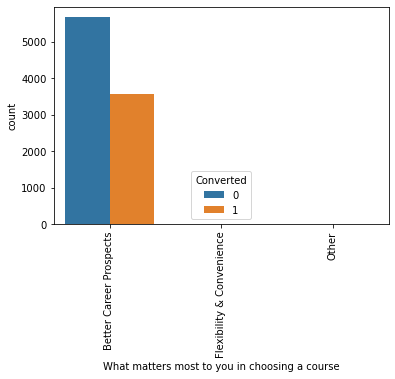

In [39]:
#visualizing count of Variable after conversion

s1=sns.countplot(df['What matters most to you in choosing a course'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [40]:
# we have another Column which can be dropped. So we Append to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [41]:
# value counts for Tags
df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [42]:
#replacing Nan values with "Not Specified"
df['Tags'] = df['Tags'].replace(np.nan,'Not Specified')

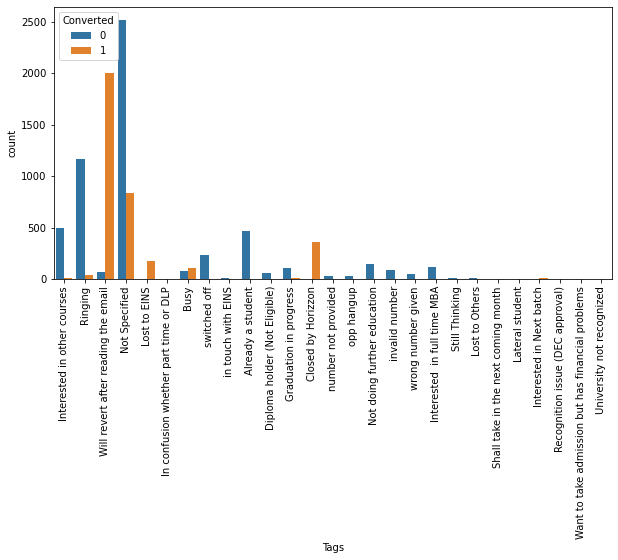

In [43]:
#visualizing count of Variable
plt.figure(figsize=(10,5))
s1=sns.countplot(df['Tags'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [44]:
#replacing tags with low frequency with "Other"
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                 'Approached upfront','Graduation in progress','number not provided', 'opp hangup',
                                 'Still Thinking','Lost to Others','Shall take in the next coming month','Lateral student',
                                 'Interested in Next batch','Recognition issue (DEC approval)',
                                 'Want to take admission but has financial problems','University not recognized','switched off',
                                 'Already a student','Not doing further education','invalid number','wrong number given',
                                 'Interested  in full time MBA'] , 'Others')

In [45]:
#re_checking percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [46]:
# value counts for Last Activity:

df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [47]:
# replacing Nan Values and grouping low frequency values

df['Last Activity'] = df['Last Activity'].replace(np.nan,'Others')
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',  'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')                 

In [48]:
# re check the Null Values
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [49]:
# dropping colums with null values as percentage is vcery low and should not effect final model
df = df.dropna()

In [50]:
#value counts for Lead Origin
df['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

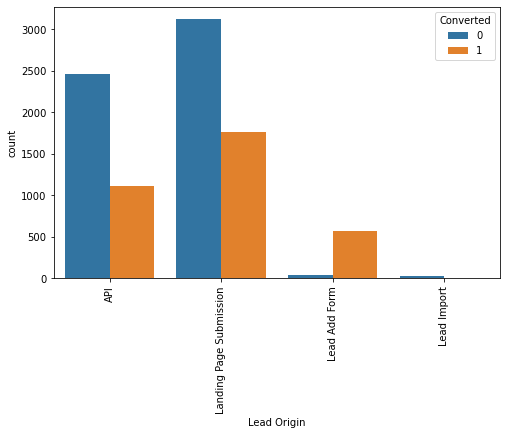

In [51]:
#visualizing count of Variable 
plt.figure(figsize=(8,5))
s1=sns.countplot(df['Lead Origin'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Insight: More leads from API and Landing Page Submission, also conversion is high. Lead Add Form has very high conversion

In [52]:
# value counts of last Notable Activity
df['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [53]:
#grouping lower frequency values

df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked','Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')

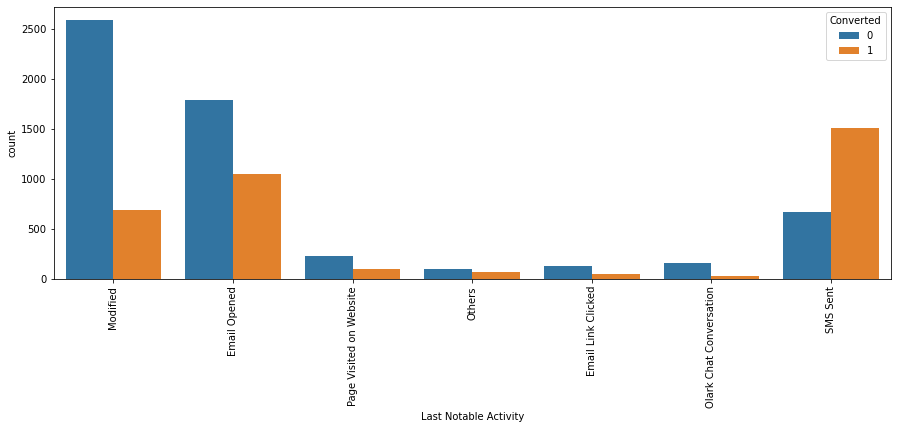

In [54]:
#count plot of Variable 

plt.figure(figsize = (15,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

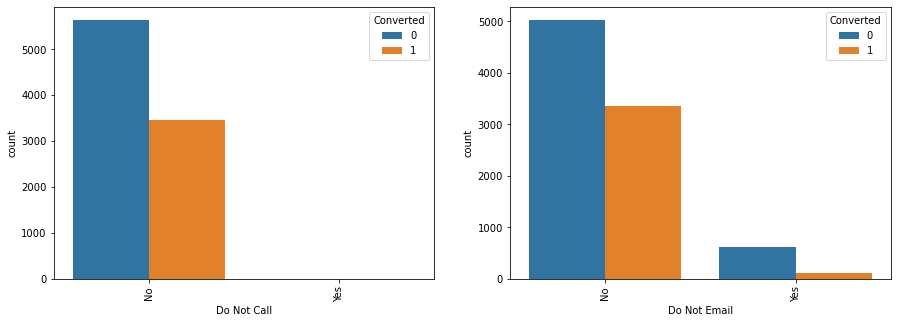

In [55]:
#Count plot for Do Not Email & Do Not Call

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(df['Do Not Call'], hue=df.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(df['Do Not Email'], hue=df.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [56]:
# Do not Call can be appended to cols_to_drop
cols_to_drop.append('Do Not Call')
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [57]:
# Value counts of remaining variables,,  All these variables are imbalanced and can be dropped
df.Search.value_counts(dropna=False)


No     9089
Yes      14
Name: Search, dtype: int64

In [58]:
df.Magazine.value_counts(dropna=False)

No    9103
Name: Magazine, dtype: int64

In [59]:
df['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [60]:
df['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [61]:
df['Newspaper'].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [62]:
df['Digital Advertisement'].value_counts(dropna=False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [63]:
df['Through Recommendations'].value_counts(dropna=False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [64]:
df['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [65]:
df['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [66]:
df['Get updates on DM Content'].value_counts(dropna=False)

No    9103
Name: Get updates on DM Content, dtype: int64

In [67]:
df['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [68]:
df['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [69]:
#adding imbalanced columns to the list cols_to_drop

cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [70]:
#list of columns to be dropped
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [71]:
#dropping columns
df = df.drop(cols_to_drop,1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

# Analysis of Numeric variables

In [72]:
## Checking for data balance

In [73]:
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

38.02043282434362

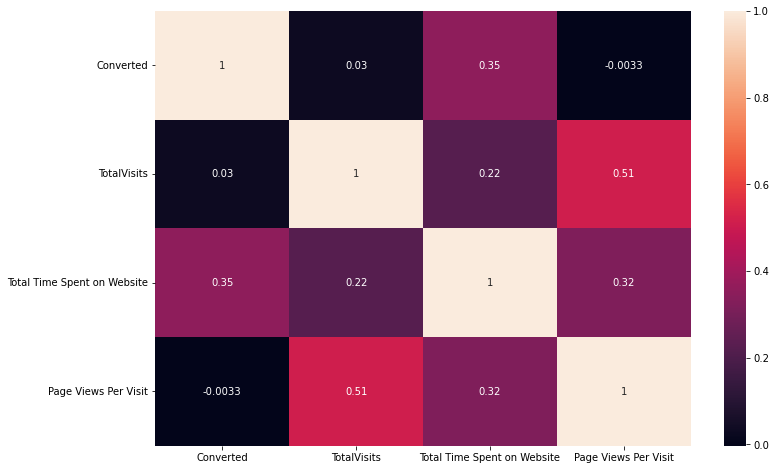

In [74]:
# correlations of numeric values

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

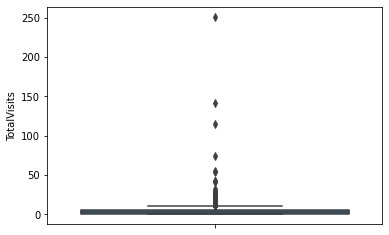

In [75]:
# Box plot for numeric variables to see spread

#Total Visits
plt.figure(figsize=(6,4))
sns.boxplot(y=df['TotalVisits'])
plt.show()

Outliers are present

In [76]:
df['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

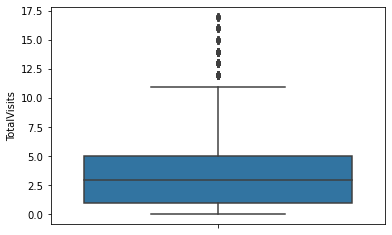

In [77]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = df.TotalVisits.quantile(0.99)
df = df[(df.TotalVisits <= Q3)]
Q1 = df.TotalVisits.quantile(0.01)
df = df[(df.TotalVisits >= Q1)]
sns.boxplot(y=df['TotalVisits'])
plt.show()

In [78]:
df.shape


(9020, 14)

lost only 83 records by removing outliers

In [79]:
#checking percentiles for "Total Time Spent on Website"

df['Total Time Spent on Website'].describe()

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
25%         7.000000
50%       243.000000
75%       915.250000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

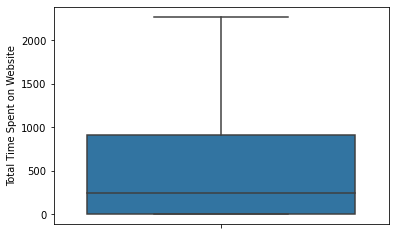

In [80]:
#visualizing spread of "Total Time Spent on Website"

plt.figure(figsize=(6,4))
sns.boxplot(y=df['Total Time Spent on Website'])
plt.show()

outlier treatment not required

In [81]:
#checking spread of "Page Views Per Visit"

df['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

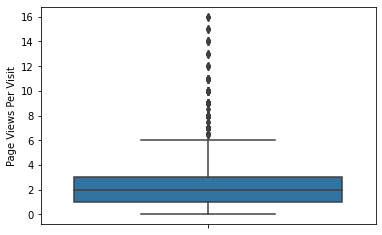

In [82]:
# box plot

plt.figure(figsize=(6,4))
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

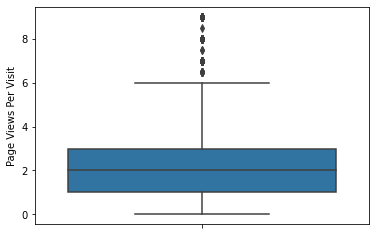

In [83]:
#Outlier Treatment: Remove top 1% 

Q3 = df['Page Views Per Visit'].quantile(0.99)
df = df[df['Page Views Per Visit'] <= Q3]

sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

In [84]:
df.shape

(8953, 14)

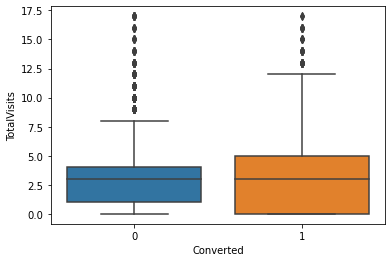

In [85]:
# Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.show()

Insight: Median for both converted and not converted looks same

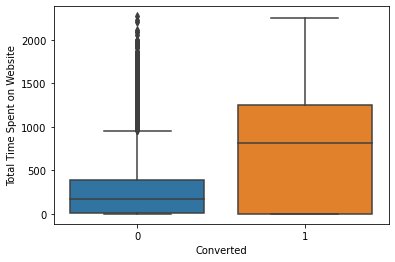

In [86]:
# Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=df.Converted, y=df['Total Time Spent on Website'])
plt.show()

Insight: Leads who spent more time on website are converted

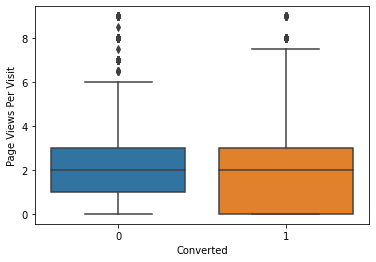

In [87]:
# Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=df.Converted,y=df['Page Views Per Visit'])
plt.show()

Median looks same for both converted and not converted

# Dummy variables creation

In [88]:
# list of categorical columns

cat_cols= df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [89]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [90]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(df[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

df = pd.concat([df,dummy],1)

In [91]:
dummy = pd.get_dummies(df['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
df = pd.concat([df, dummy], axis = 1)

In [92]:
dummy = pd.get_dummies(df['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
df = pd.concat([df, dummy], axis = 1)

In [93]:
dummy = pd.get_dummies(df['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
df = pd.concat([df, dummy], axis = 1)

In [94]:
dummy = pd.get_dummies(df['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Others'], 1)
df = pd.concat([df, dummy], axis = 1)

In [95]:
dummy = pd.get_dummies(df['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Others'], 1)
df = pd.concat([df, dummy], axis = 1)

In [96]:
#dropping the original columns after dummy variable creation

df.drop(cat_cols,1,inplace = True)

In [97]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [98]:
df.shape

(8953, 57)

# Train - Test split and Logestic regression model building

In [99]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = df['Converted']

y.head()

X=df.drop('Converted', axis=1)

In [100]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [101]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 8044 to 1369
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 5   Lead Origin_Lead Import                               6267 non-null   uint8  
 6   What is your current occupation_Housewife             6267 non-null   uint8  
 7   What is your current occupation_Other                 6267 non-null   uint8  
 8   What is your current occupation_Student               6

# Scaling of Data

In [102]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email
8044,-0.736830,0.580153,-0.668269,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3169,-0.391658,-0.729871,-0.137309,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3654,-0.046486,-0.406045,0.393651,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6025,3.405235,0.177210,2.252011,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7700,0.298686,-0.234932,0.924611,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


# Model Building using Stats Model & RFE

In [103]:
import statsmodels.api as sm

In [104]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [105]:
rfe.support_

array([False,  True, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True])

In [106]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 5),
 ('What is your current occupation_Housewife', False, 25),
 ('What is your current occupation_Other', False, 22),
 ('What is your current occupation_Student', False, 18),
 ('What is your current occupation_Unemployed', False, 17),
 ('What is your current occupation_Working Professional', False, 3),
 ('City_Other Cities', False, 21),
 ('City_Other Cities of Maharashtra', False, 31),
 ('City_Other Metro Cities', False, 37),
 ('City_Thane & Outskirts', False, 34),
 ('City_Tier II Cities', False, 24),
 ('Specialization_Banking, Investment And Insurance', False, 32),
 ('Specialization_Business Administration', False, 33),
 ('Specialization_E-Business', False, 27),
 ('Specialization_E-COMMERCE', False, 16),
 ('Specialization_International Business', Fals

In [107]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Specialization_Travel and Tourism',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Not Specified',
       'Tags_Ringing', 'Tags_Will revert after reading the email'],
      dtype='object')

In [108]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management', 'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_Olark Chat',
       'Lead S

In [109]:
# MODEL 1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1174.2
Date:                Sat, 12 Nov 2022   Deviance:                       2348.5
Time:                        17:34:28   Pearson chi2:                 1.00e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6149
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.4307      0.220    -15.559      0.000      -3.863      -2.999
Total Time Spent on Website                       1.0056      0.057     17.505      0.000       0.893       1.118
Lead Origin_Landing Page Submission              -1.0977      0.122     -8.985      0.000      -1.337      -0.858
Lead Origin_Lead Add Form                         1.0883      0.461      2.360      0.018       0.184       1.992
Specialization_Travel and Tourism                -0.9041      0.453     -1.995      0.046      -1.792      -0.016
Lead Source_Welingak Website                      4.2103      1.116      3.773      0.000       2.023       6.398
Last Activity_SMS Sent                            1.3434      0.241      5.586      0.000       0.872       1.815
Last Notable Activity_Modified                   -1.3695      0.158     -8.691      0.000      -1.678      -1.061
Last Notable Activity_Olark Chat Conversation    -1.6330      0.488     -3.345      0.001      -2.590      -0.676
Last Notable Activity_SMS Sent                    0.8771      0.273      3.207      0.001       0.341       1.413
Tags_Busy                                         3.3706      0.300     11.249      0.000       2.783       3.958
Tags_Closed by Horizzon                          29.8937   1.37e+04      0.002      0.998   -2.68e+04    2.69e+04
Tags_Lost to EINS                                 8.5573      0.639     13.397      0.000       7.305       9.809
Tags_Not Specified                                2.5017      0.213     11.724      0.000       2.083       2.920
Tags_Ringing                                     -0.9158      0.305     -3.000      0.003      -1.514      -0.317
Tags_Will revert after reading the email          7.0900      0.271     26.162      0.000       6.559       7.621
=================================================================================================================
"""

p-value of Tags_Closed by Horizzon is high, so variable can be dropped

In [110]:
#dropping column with high p-value

col = col.drop('Tags_Closed by Horizzon',1)

In [111]:
# MODEL 2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1554.8
Date:                Sat, 12 Nov 2022   Deviance:                       3109.5
Time:                        17:34:29   Pearson chi2:                 1.36e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5652
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.6673      0.127    -13.157      0.000      -1.916      -1.419
Total Time Spent on Website                       0.9957      0.049     20.396      0.000       0.900       1.091
Lead Origin_Landing Page Submission              -0.7806      0.104     -7.480      0.000      -0.985      -0.576
Lead Origin_Lead Add Form                         4.1861      0.281     14.909      0.000       3.636       4.736
Specialization_Travel and Tourism                -0.6177      0.365     -1.694      0.090      -1.332       0.097
Lead Source_Welingak Website                      1.9303      1.054      1.832      0.067      -0.135       3.995
Last Activity_SMS Sent                            0.7287      0.205      3.555      0.000       0.327       1.130
Last Notable Activity_Modified                   -0.8119      0.120     -6.757      0.000      -1.047      -0.576
Last Notable Activity_Olark Chat Conversation    -1.5773      0.448     -3.524      0.000      -2.455      -0.700
Last Notable Activity_SMS Sent                    1.1343      0.237      4.788      0.000       0.670       1.599
Tags_Busy                                         1.4755      0.237      6.232      0.000       1.011       1.940
Tags_Lost to EINS                                 6.1543      0.603     10.203      0.000       4.972       7.336
Tags_Not Specified                                0.5839      0.116      5.015      0.000       0.356       0.812
Tags_Ringing                                     -3.0151      0.270    -11.147      0.000      -3.545      -2.485
Tags_Will revert after reading the email          4.8811      0.189     25.812      0.000       4.511       5.252
=================================================================================================================
"""

p-values are low so checking Variance Inflation Factor to see if there is any correlation between the variables

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [113]:
# dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Notable Activity_SMS Sent,6.17
5,Last Activity_SMS Sent,6.09
1,Lead Origin_Landing Page Submission,1.99
13,Tags_Will revert after reading the email,1.77
6,Last Notable Activity_Modified,1.68
2,Lead Origin_Lead Add Form,1.59
11,Tags_Not Specified,1.56
4,Lead Source_Welingak Website,1.31
12,Tags_Ringing,1.31
0,Total Time Spent on Website,1.25


In [114]:
#dropping variable with high VIF

col = col.drop('Last Notable Activity_SMS Sent',1)

In [115]:
# MODEL 3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1566.7
Date:                Sat, 12 Nov 2022   Deviance:                       3133.3
Time:                        17:34:29   Pearson chi2:                 1.28e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5635
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.5111      0.120    -12.552      0.000      -1.747      -1.275
Total Time Spent on Website                       0.9865      0.049     20.324      0.000       0.891       1.082
Lead Origin_Landing Page Submission              -0.8162      0.103     -7.897      0.000      -1.019      -0.614
Lead Origin_Lead Add Form                         4.1562      0.282     14.727      0.000       3.603       4.709
Specialization_Travel and Tourism                -0.6460      0.359     -1.798      0.072      -1.350       0.058
Lead Source_Welingak Website                      1.8626      1.057      1.763      0.078      -0.208       3.933
Last Activity_SMS Sent                            1.5619      0.104     15.038      0.000       1.358       1.766
Last Notable Activity_Modified                   -1.1260      0.104    -10.861      0.000      -1.329      -0.923
Last Notable Activity_Olark Chat Conversation    -1.6950      0.447     -3.794      0.000      -2.571      -0.819
Tags_Busy                                         1.4638      0.233      6.290      0.000       1.008       1.920
Tags_Lost to EINS                                 6.2144      0.605     10.269      0.000       5.028       7.401
Tags_Not Specified                                0.5374      0.116      4.651      0.000       0.311       0.764
Tags_Ringing                                     -2.9363      0.267    -10.985      0.000      -3.460      -2.412
Tags_Will revert after reading the email          4.8671      0.190     25.683      0.000       4.496       5.239
=================================================================================================================
"""

In [116]:
#  feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,1.98
12,Tags_Will revert after reading the email,1.71
5,Last Activity_SMS Sent,1.65
2,Lead Origin_Lead Add Form,1.59
10,Tags_Not Specified,1.54
6,Last Notable Activity_Modified,1.41
4,Lead Source_Welingak Website,1.31
11,Tags_Ringing,1.30
0,Total Time Spent on Website,1.25
8,Tags_Busy,1.07


All values look under control, moving to predictions on train data

In [117]:
# Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8044    0.999935
3169    0.075166
3654    0.020758
6025    0.060596
7700    0.004089
4560    0.328079
6688    0.023044
1659    0.062829
542     0.001330
7236    0.996302
dtype: float64

In [118]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.99993535, 0.07516634, 0.02075789, 0.06059568, 0.00408907,
       0.32807872, 0.02304351, 0.06282889, 0.00132989, 0.99630174])

In [119]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.999935,8044
1,0,0.075166,3169
2,0,0.020758,3654
3,0,0.060596,6025
4,0,0.004089,7700


In [120]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.999935,8044,1
1,0,0.075166,3169,0
2,0,0.020758,3654,0
3,0,0.060596,6025,0
4,0,0.004089,7700,0


In [121]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3683  197]
 [ 438 1949]]


In [122]:
# overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8986756023615765


In [123]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [124]:
# sensitivity 
TP / float(TP+FN)

0.8165060745705907

In [125]:
# specificity
TN / float(TN+FP)

0.9492268041237113

# ROC Curve

In [126]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [127]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

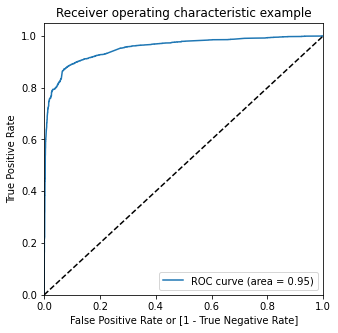

In [128]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

ROC curve area = 0.95

# Finding Optimal Cutoff Point

In [129]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.999935,8044,1,1,1,1,1,1,1,1,1,1,1
1,0,0.075166,3169,0,1,0,0,0,0,0,0,0,0,0
2,0,0.020758,3654,0,1,0,0,0,0,0,0,0,0,0
3,0,0.060596,6025,0,1,0,0,0,0,0,0,0,0,0
4,0,0.004089,7700,0,1,0,0,0,0,0,0,0,0,0


In [130]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380884  1.000000  0.000000
0.1   0.1  0.781554  0.962715  0.670103
0.2   0.2  0.869954  0.912861  0.843557
0.3   0.3  0.898037  0.889401  0.903351
0.4   0.4  0.906654  0.868873  0.929897
0.5   0.5  0.898676  0.816506  0.949227
0.6   0.6  0.898835  0.793884  0.963402
0.7   0.7  0.895644  0.759531  0.979381
0.8   0.8  0.885591  0.723083  0.985567
0.9   0.9  0.861816  0.651445  0.991237


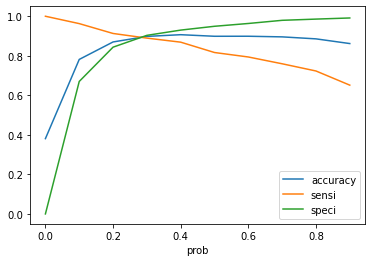

In [131]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [132]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.999935,8044,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.075166,3169,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.020758,3654,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.060596,6025,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.004089,7700,0,1,0,0,0,0,0,0,0,0,0,0


In [133]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.999935,8044,1,100
1,0,0.075166,3169,0,8
2,0,0.020758,3654,0,2
3,0,0.060596,6025,0,6
4,0,0.004089,7700,0,0


In [134]:
# accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8980373384394447

In [135]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3505,  375],
       [ 264, 2123]], dtype=int64)

In [136]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [137]:
# sensitivity 
TP / float(TP+FN)

0.8894009216589862

In [138]:
# specificity
TN / float(TN+FP)

0.9033505154639175

In [139]:
#Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9082013047530288

In [140]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8165060745705907

# scaling test set

In [141]:


num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email
8430,-1.083588,-0.888671,-1.189398,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6194,-1.083588,-0.888671,-1.189398,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
83,-1.083588,-0.888671,-1.189398,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
884,1.999951,1.030337,3.493040,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
563,-0.740973,0.207382,-0.669127,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [142]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Specialization_Travel and Tourism,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Busy,Tags_Lost to EINS,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email
8430,-0.888671,0,0,0,0,0,1,0,0,0,1,0,0
6194,-0.888671,0,0,0,0,0,0,1,0,0,1,0,0
83,-0.888671,0,0,0,0,0,1,0,0,0,1,0,0
884,1.030337,1,0,0,0,0,0,0,0,0,0,0,1
563,0.207382,1,0,0,0,0,1,0,1,0,0,0,0


In [143]:
X_test_sm = sm.add_constant(X_test)

# Predicting on test set

In [144]:
y_test_pred = res.predict(X_test_sm)

In [145]:
y_test_pred[:10]

8430    0.048506
6194    0.028049
83      0.048506
884     0.972247
563     0.143703
6774    0.989316
8472    0.409856
146     0.076261
5728    0.135830
8452    0.970441
dtype: float64

In [146]:
# Converting y_pred to a dataframe from an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [147]:
y_pred_1.head()

,0
8430,0.048506
6194,0.028049
83,0.048506
884,0.972247
563,0.143703


In [148]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [149]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [150]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [151]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [152]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,8430,0.048506
1,0,6194,0.028049
2,0,83,0.048506
3,1,884,0.972247
4,1,563,0.143703


In [153]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [154]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,8430,0.048506
1,0,6194,0.028049
2,0,83,0.048506
3,1,884,0.972247
4,1,563,0.143703


In [155]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [156]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,8430,0,0.048506,5
1,6194,0,0.028049,3
2,83,0,0.048506,5
3,884,1,0.972247,97
4,563,1,0.143703,14


In [157]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [158]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,8430,0,0.048506,5,0
1,6194,0,0.028049,3,0
2,83,0,0.048506,5,0
3,884,1,0.972247,97,1
4,563,1,0.143703,14,0


In [159]:
# overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8894266567386448

In [160]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1503,  175],
       [ 122,  886]], dtype=int64)

In [161]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [162]:
# sensitivity 
TP / float(TP+FN)

0.878968253968254

In [163]:
# specificity
TN / float(TN+FP)

0.8957091775923719

In [165]:

#Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9082013047530288

In [166]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8165060745705907

# Results:

Train Data: 
Accuracy : 89.80%
Sensitivity : 88.94%
Specificity : 90.33%
    
    
Test Data: 
Accuracy : 88.94%
Sensitivity : 87.89%
Specificity : 89.57%

Recall rate of 81.65% on test data and train data. So model seems to be performing reasonably ok.